## Hénon map

Were going to calculate the parameterization of stable and unestable manifolds around one hyperbolic fixed point for the Hénon map.

In [3]:
# load libraryes
using PyPlot
using TaylorSeries
using IntervalArithmetic, IntervalRootFinding
using ValidatedNumerics
using StaticArrays



In [4]:
#load the code of parameterization method
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")

3-element Array{Any,1}:
 "/home/evelyn/julia0.6/julia-903644385b/local/share/julia/site/v0.6"
 "/home/evelyn/julia0.6/julia-903644385b/share/julia/site/v0.6"      
 "/home/evelyn/Documentos/Tesis/Programas/IPM"                       

In [5]:
using ParametrizacionMetodo

Define the function Hénon, the input is one point $(x,y)$ and the two parameters $a,b$, return an array of two values.

In [6]:
function Henon(x,y,a,b)
   
    x_n = a-b*y-x^2
    y_n = x 

    return [x_n,y_n]
end

Henon (generic function with 1 method)

Define the function that calculate the fixed point and depends of the parameter value.

In [7]:
function parametro(a)
    x1 = -1.+(1.+a)^.5
    x2 = -1.-(1.+a)^.5
    return [x2,x2]
end
    

parametro (generic function with 1 method)

One condition of the input in the method is that the function of map only recibe two values, so we create a new function called $f\_henon()$ that only receive two variables.

In [8]:
a=1.5 #value of the parameter
f_henon(x,y)=Henon(x,y,a,1.) #new function for input in the method
punto1 = parametro(a) #fixed point accord to value of the parameter


2-element Array{Float64,1}:
 -2.58114
 -2.58114

Now we calculate the parameterization of manifolds with two functions called Inestable=Unstable and Estable=Stable. These functions ned like variables one map, the order of the polinomial we want, the fixed point, an interval for the values of the parameter $t$ and one step for do trought the interval.

In [9]:
Orden = 45 #order of the parameterization
x_fijo = [punto1[1],punto1[2]] #fixed point
tiempo = [0.,3.] # interval of parameter
delta_t = 0.125 #step 
W_u, f_u, vec_prop, val_prop = Inestable(f_henon,Orden,punto1,tiempo, delta_t); #Unestable manifold
W_s, f_us, vec_prop_s, val_prop_s = Estable(f_henon, Orden , x_fijo, tiempo, delta_t); #Stable manifold

Both functions Inestable and Estable returns four things, first is the polinomial of orden $n$ in one array, second is the right side of the cohomological equation, third is the eigenvector and next the eigenvalue. 

Now we need a function for vizualizating the manifolds. 

In [10]:
function iterarMap(f,x_i,p_i,n)   #Function for interation of the map.
    x = x_i                      # Initial conditions   
    y = p_i                          
    
    iteradosMX = [x_i]          # define the arrays for values of each iteration 
    iteradosMY = [p_i] 

    for i=1:n   
        F = f(x_i,p_i)
        push!(iteradosMX,F[1])
        push!(iteradosMY,F[2])
        x_i = F[1]
        p_i = F[2]
    end

    return iteradosMX, iteradosMY #the function returns two list with the values of the orbits.
end

iterarMap (generic function with 1 method)

Well... two functions

In [11]:
function graficarMap(l)
    n=100
    step=0.1
    i=0
    j=0
    
    for p_i=-3.73861-3.:step:-3.73861+3.
        j=j+1
        for x_i =-3.73861-3.:step:-3.73861+3.
        #x_i=-3.73861-3.
            i=i+1
            t,p = iterarMap(f_henon,x_i,p_i,n)
            #@show(p)
            p = scatter(t[3:length(t)],p[3:length(p)],marker=",",s=0.1,color="gray")
            xlim(-10,10)
            ylim(-10,10)
        end
    end
    
end

graficarMap (generic function with 1 method)

or tree

In [25]:
function evaluar(Tiempo, paso,A,B,PuntoFijo,col)
    ValX=Float64[]
    
    ValY=Float64[]
    push!(ValX, PuntoFijo[1]) 
    push!(ValY, PuntoFijo[2])

    for t = Tiempo[1]:paso:Tiempo[2]
        
        x = evaluate(A,t)
        y = evaluate(B,t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    p = plot(ValX,ValY,linestyle="None",marker =",",color=col)
    #graficarMap(50)
    title("Espacio Fase")
    xlabel(L"x")
    ylabel(L"y")
    #legend(loc="upper right",fancybox="true")
    xlim(-5.,5.)
    ylim(-5.,5.)
    #grid("on")
    return ValX,ValY
    
end

evaluar (generic function with 1 method)

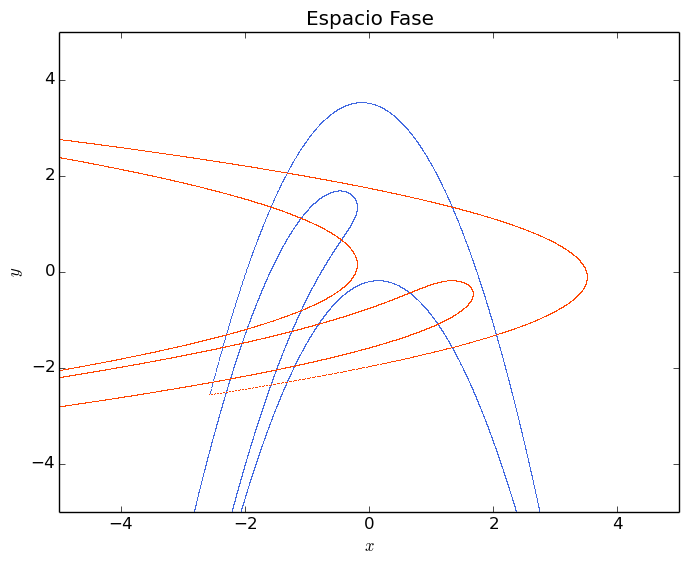

([-2.58114, -2.58114, -2.55666, -2.53225, -2.50789, -2.4836, -2.45937, -2.4352, -2.4111, -2.38705  …  -281.314, -281.418, -281.521, -281.624, -281.727, -281.83, -281.934, -282.037, -282.14, -282.244], [-2.58114, -2.58114, -2.5762, -2.57126, -2.56633, -2.5614, -2.55647, -2.55154, -2.54662, -2.5417  …  -16.9351, -16.9382, -16.9412, -16.9443, -16.9473, -16.9504, -16.9535, -16.9565, -16.9596, -16.9626])

In [28]:

figure(3)
evaluar([0.,1000.], 0.025, W_u[1],W_u[2],x_fijo,"royalblue")
evaluar([0.,1000.], 0.025, W_s[1],W_s[2],x_fijo,"orangered")

We need calculate the error in the method 

In [22]:
tiem = [0.,1000.]
ErrorI_O20 = CalculoError(f_henon, W_u,f_u,tiem,0.025 );
ErrorE_O20 = CalculoError(f_henon, W_s,f_us,tiem,0.025 );


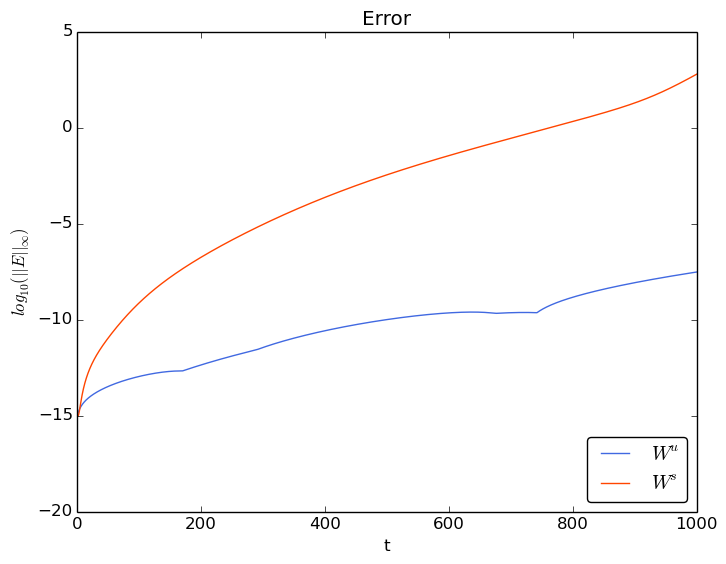

PyObject <matplotlib.legend.Legend object at 0x7f3076d62a10>

In [23]:
plot(ErrorI_O20[1],log10.(ErrorI_O20[2]),marker= "None", label=L"W^{u}",color="royalblue")
plot(ErrorE_O20[1],log10.(ErrorE_O20[2]),marker= "None", label=L"W^{s}",color="orangered")

xlabel("t")
ylabel(L"$log_{10}(|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

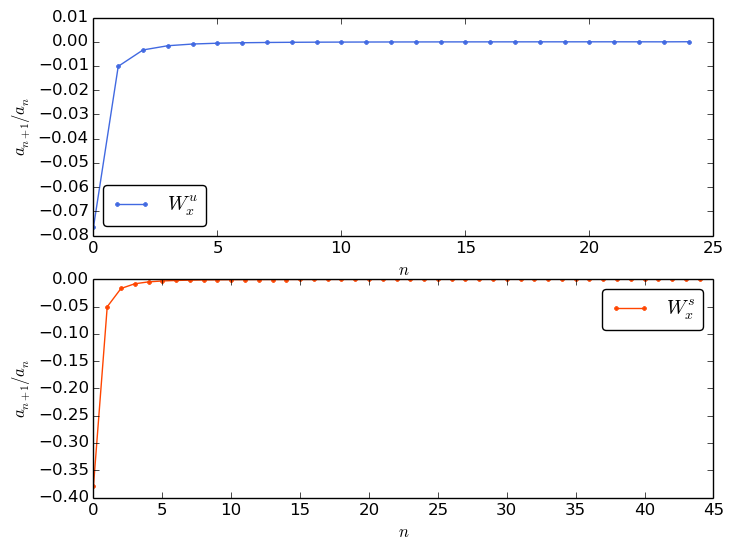

PyObject <matplotlib.legend.Legend object at 0x7f3076a6ffd0>

In [24]:
ConverU=Convergencia(W_u[1],W_u[2])#Convergency of Hadamard
ConverS=Convergencia(W_s[1],W_s[2])
subplot(2,1,1)
plot(ConverU[1],marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"a_{n+1}/a_{n}")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(ConverS[1],marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"a_{n+1}/a_{n}")
legend(loc="upper right",fancybox="true" )

## Mapeo de Hénon con a=0.7

In [25]:
a= parse(BigFloat,"1.5")
b=parse(BigFloat,"1.")
h_henon(x,y)=Henon(x,y,a,b)
punto2 = parametro(a)

2-element Array{BigFloat,1}:
 -2.581138830084189665999446772216359266859777569662608413428752426396297219319615
 -2.581138830084189665999446772216359266859777569662608413428752426396297219319615

### 
k=parse(BigFloat,"0.3")
g_henon(x,y)=Henon(x,y,a,k)

In [15]:
a1 = 0.7
f1_henon(x,y) = Henon(x,y,a1,1.)
punto2 = parametro(a1)

2-element Array{Float64,1}:
 -2.30384
 -2.30384

In [16]:
Orden1 = 50
x_fijo = [punto2[1],punto2[2]]
tiempo = [0.,4.]
delta_t = 0.125
W_u1, f_u1, vec_prop1, val_prop1 = Inestable(f1_henon, Orden1, punto2, tiempo, delta_t);
W_s1, f_us1, vec_prop_s1, val_prop_s1 = Estable(f1_henon, Orden1 , punto2, tiempo, delta_t);

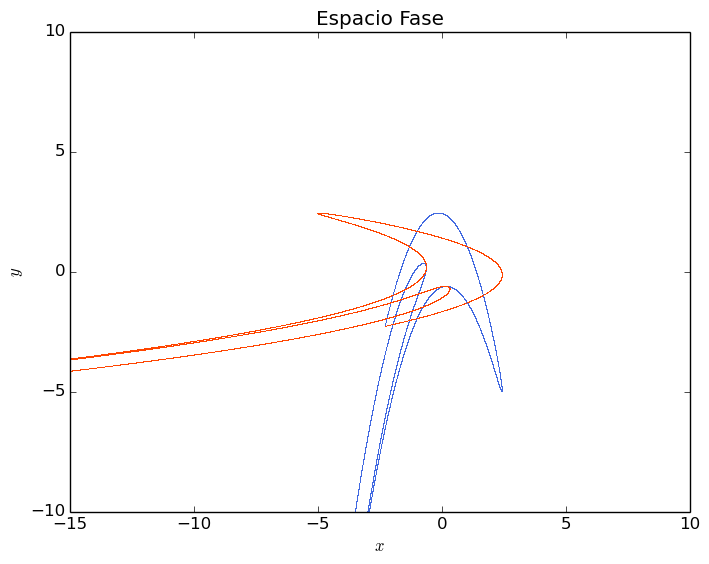

([-2.30384, -2.30384, -2.27951, -2.25526, -2.23109, -2.207, -2.18299, -2.15906, -2.13521, -2.11145  …  -352.66, -352.723, -352.786, -352.848, -352.911, -352.974, -353.037, -353.1, -353.162, -353.225], [-2.30384, -2.30384, -2.29828, -2.29272, -2.28716, -2.28161, -2.27607, -2.27052, -2.26499, -2.25945  …  -18.9082, -18.9098, -18.9115, -18.9132, -18.9148, -18.9165, -18.9182, -18.9198, -18.9215, -18.9232])

In [17]:
evaluar([0.,800.], 0.025, W_u1[1],W_u1[2],punto2,"royalblue")
evaluar([0.,800.], 0.025, W_s1[1],W_s1[2],punto2,"orangered")

In [18]:
tiem = [0.,1000.]
ErrorI = CalculoError(f1_henon, W_u1,f_u1,tiem,0.025 );
ErrorE = CalculoError(f1_henon, W_s1,f_us1,tiem,0.025 );

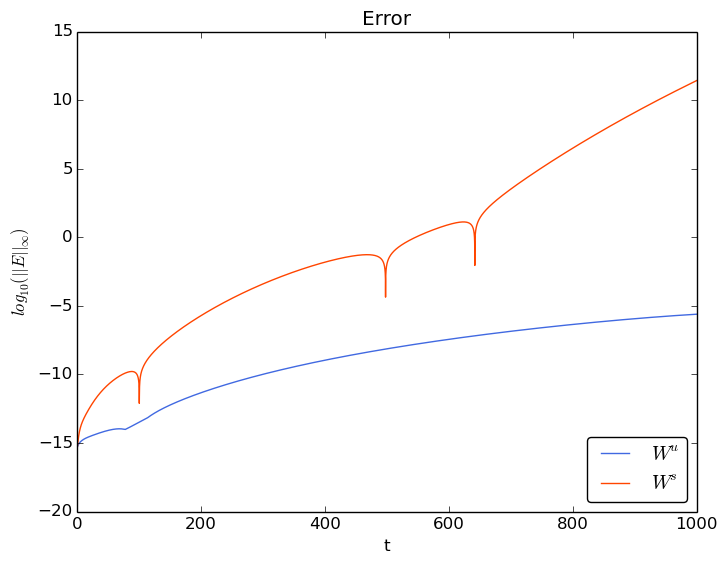

PyObject <matplotlib.legend.Legend object at 0x7f85c883e110>

In [19]:
plot(ErrorI[1],log10.(ErrorI[2]),marker= "None", label=L"W^{u}",color="royalblue")
plot(ErrorE[1],log10.(ErrorE[2]),marker= "None", label=L"W^{s}",color="orangered")

xlabel("t")
ylabel(L"$log_{10}(|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

In [20]:
a2=6.5
f2_henon(x,y)=Henon(x,y,a2,1.)
punto3 = parametro(a2)

2-element Array{Float64,1}:
 -3.73861
 -3.73861

In [21]:
Orden2 = 78
tiempo = [0.,4.]
delta_t = 0.125
W_u2, f_u2, vec_prop2, val_prop2 = Inestable(f2_henon, Orden2, punto3, tiempo, delta_t);
W_s2, f_us2, vec_prop_s2, val_prop_s2 = Estable(f2_henon, Orden2 , punto3, tiempo, delta_t);

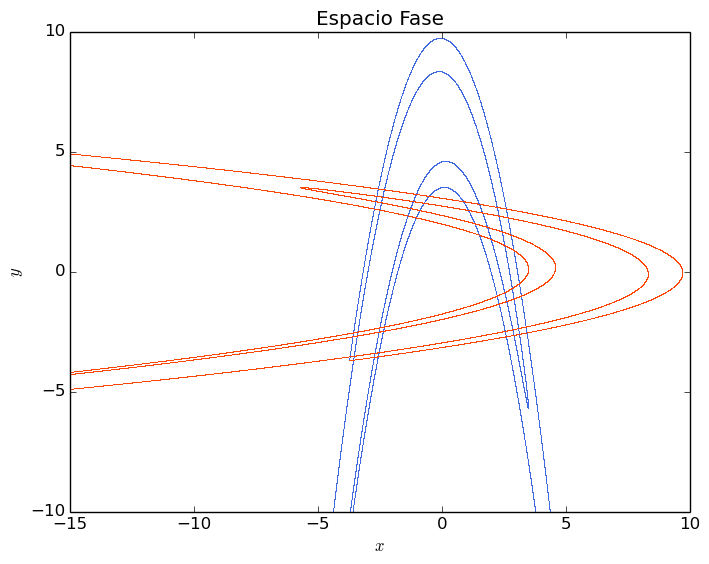

([-3.73861, -3.73861, -3.71385, -3.68912, -3.66442, -3.63974, -3.61509, -3.59046, -3.56586, -3.54129  …  -27714.4, -27717.4, -27720.4, -27723.4, -27726.3, -27729.3, -27732.3, -27735.3, -27738.3, -27741.3], [-3.73861, -3.73861, -3.73524, -3.73187, -3.72849, -3.72512, -3.72175, -3.71838, -3.715, -3.71163  …  -166.535, -166.544, -166.553, -166.562, -166.571, -166.58, -166.589, -166.598, -166.607, -166.616])

In [22]:
evaluar([0.,4300.], 0.025, W_u2[1],W_u2[2],punto3,"royalblue")
evaluar([0.,4300.], 0.025, W_s2[1],W_s2[2],punto3,"orangered")

In [23]:
tiem = [0.,5000.]
ErrorI2 = CalculoError(f2_henon, W_u2,f_u2,tiem,0.025 );
ErrorE2 = CalculoError(f2_henon, W_s2,f_us2,tiem,0.025 );


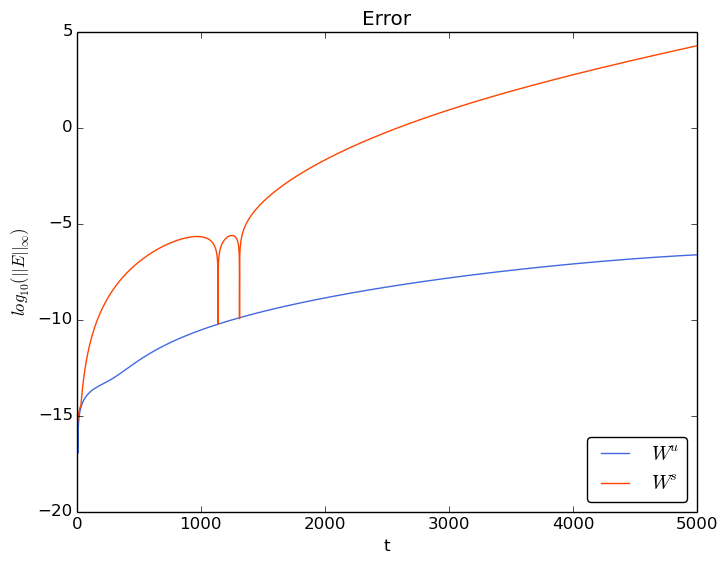

PyObject <matplotlib.legend.Legend object at 0x7f85c89c2cd0>

In [24]:
plot(ErrorI2[1],log10.(ErrorI2[2]),marker= "None", label=L"W^{u}",color="royalblue")
plot(ErrorE2[1],log10.(ErrorE2[2]),marker= "None", label=L"W^{s}",color="orangered")

xlabel("t")
ylabel(L"$log_{10}(|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

# Encontrando puntos homoclínicos

In [25]:
function Interseccion(p)
    (x,y)=p
    V= SVector( W_u[1](x)-W_s[1](y), W_u[2](x)-W_s[2](y) )
    
    #@show(V)
end

Interseccion (generic function with 1 method)

In [26]:
X = (-1.0..100.0)×(0.1..100.) # 2D IntervalBox;

In [27]:
r=roots(Interseccion,X,Newton, 1e-6)

3-element Array{IntervalRootFinding.Root{IntervalArithmetic.IntervalBox{2,Float64}},1}:
 Root([26.1207, 26.1208] × [26.1207, 26.1208], :unique)
 Root([33.6142, 33.6143] × [6.77612, 6.77613], :unique)
 Root([6.77612, 6.77613] × [33.6142, 33.6143], :unique)

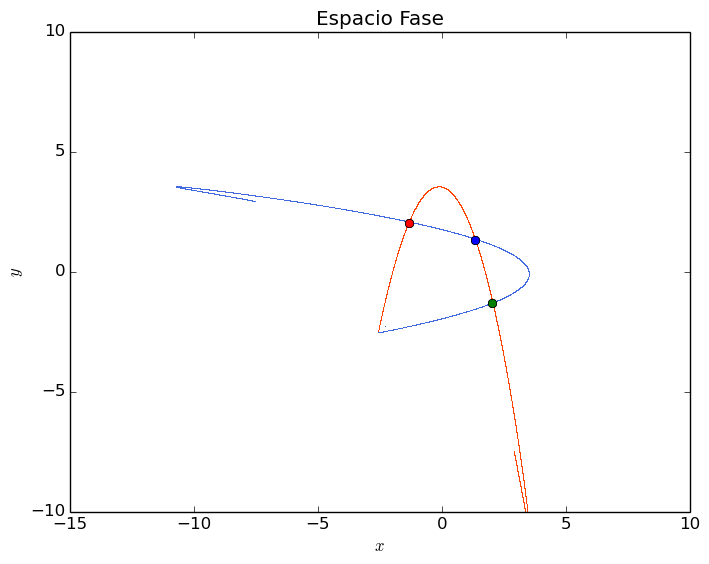

In [28]:
# pygui(true)
evaluar([0.,100.12], 0.025, W_u[1],W_u[2],x_fijo,"orangered")
evaluar([0.,100.12], 0.025, W_s[1],W_s[2],x_fijo,"royalblue")
for ind in eachindex(r)
    plot(W_u[1].([r[ind].interval[1].lo, r[ind].interval[1].hi]), 
         W_u[2].([r[ind].interval[1].lo, r[ind].interval[1].hi]),"o")
end

In [29]:
intervaloX = hull(W_s[1](r[1].interval[1]),W_u[1](r[1].interval[2]))
intervaloY = hull(W_s[2](r[1].interval[1]),W_u[2](r[1].interval[2]))

[1.32898, 1.32899]

In [30]:
intervaloX

[1.32898, 1.32899]

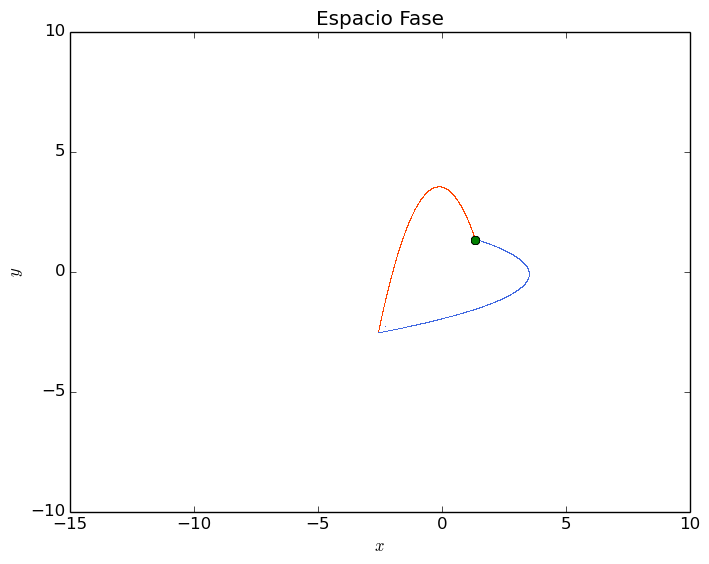

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f85c8580810>

In [31]:
delta1 =r[1].interval[1].lo/1000
delta2 =r[1].interval[2].lo/1000

evaluar([0.,r[1].interval[1].hi+delta1], delta1 , W_u[1],W_u[2],x_fijo,"orangered")
evaluar([0.,r[1].interval[2].hi+delta2], delta2, W_s[1],W_s[2],x_fijo,"royalblue")
plot([intervaloX.lo,intervaloX.hi,intervaloX.hi,intervaloX.lo],
    [intervaloY.lo,intervaloY.lo,intervaloY.hi,intervaloY.hi],"o",linestyle="-",color="green")
#evaluar([0.,r[1].interval[1].lo], 1e-2, W_u[1],W_u[2],x_fijo,"pink")

#evaluar([0.,r[1].interval[2].lo], 1e-2, W_s[1],W_s[2],x_fijo,"green")


In [32]:
using PyPlot
using PyCall
@pyimport matplotlib.patches as patch

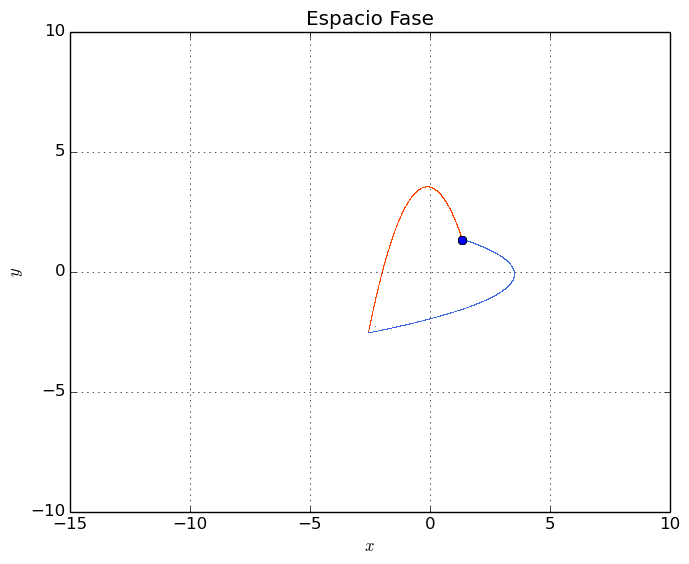

In [33]:
#pygui(true)
cfig = figure()
evaluar([0.,r[1].interval[1].hi+delta1], delta1, W_u[1],W_u[2],x_fijo,"orangered")
evaluar([0.,r[1].interval[2].hi+delta2], delta2 , W_s[1],W_s[2],x_fijo,"royalblue")
xx=intervaloX.lo
yy=intervaloY.lo
diam_x = intervaloX.hi-intervaloX.lo
diam_y = intervaloY.hi-intervaloY.lo
plot([intervaloX.lo,intervaloX.hi,intervaloX.hi,intervaloX.lo],
    [intervaloY.lo,intervaloY.lo,intervaloY.hi,intervaloY.hi],"o")
ax = cfig[:add_subplot](1,1,1)
ax[:set_aspect]("equal")
c = patch.Rectangle([xx,yy],diam_x,diam_y,fc="pink",ec="red",linewidth=.5,alpha = 0.5)
ax[:add_artist](c)
cfig[:savefig]("rectangle.png")
grid("on")

In [34]:
W_u[1](r[1].interval[1].lo)

1.3289874527125143

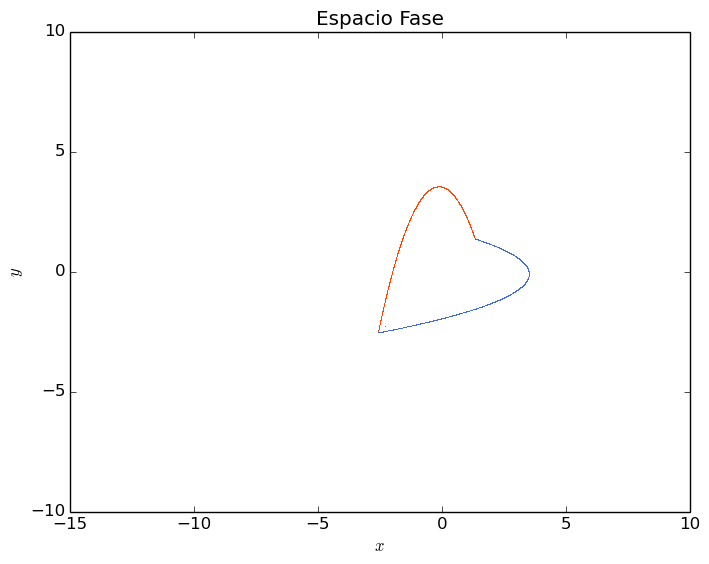

([-2.30384, -2.58114, -2.55666, -2.53225, -2.50789, -2.4836, -2.45937, -2.4352, -2.4111, -2.38705  …  1.40658, 1.39873, 1.39087, 1.383, 1.37512, 1.36723, 1.35933, 1.35142, 1.3435, 1.33558], [-2.30384, -2.58114, -2.5762, -2.57126, -2.56633, -2.5614, -2.55647, -2.55154, -2.54662, -2.5417  …  1.30284, 1.30551, 1.30817, 1.31084, 1.3135, 1.31616, 1.31882, 1.32148, 1.32413, 1.32678])

In [35]:
evaluar([0.,26.12], 0.025, W_u[1],W_u[2],x_fijo,"orangered")
evaluar([0.,26.12], 0.025, W_s[1],W_s[2],x_fijo,"royalblue")

In [36]:
l_henon(x,y)=Henon(x,y,6.5,1)
punto4= parametro(6.5)

2-element Array{Float64,1}:
 -3.73861
 -3.73861

In [37]:
Orden = 55
tiempo = [0.,3.]
delta_t = 0.125
U2, Uf2, vec_propU2, val_propU2 = Inestable(l_henon,Orden, punto4 ,tiempo, delta_t)
S2, Sc2, vec_propS2, val_propS2 = Estable(l_henon, Orden , punto4, tiempo, delta_t)

(TaylorSeries.Taylor1{Float64}[ - 3.7386127875258306 + 0.9908490602410868 t - 0.021144656610015366 t² + 0.00010795824258162249 t³ - 2.2820411370282007e-7 t⁴ + 2.354401936638939e-10 t⁵ - 1.391198574993085e-13 t⁶ + 5.17929053332535e-17 t⁷ - 1.2911545290882814e-20 t⁸ + 2.2564786583916907e-24 t⁹ - 2.874689942071182e-28 t¹⁰ + 2.758197444524272e-32 t¹¹ - 2.046797142149693e-36 t¹² + 1.200343697390866e-40 t¹³ - 5.662679654054682e-45 t¹⁴ + 2.181272012825054e-49 t¹⁵ - 6.949821403021877e-54 t¹⁶ + 1.8525421224913193e-58 t¹⁷ - 4.173905789705305e-63 t¹⁸ + 8.022798068691299e-68 t¹⁹ - 1.3267070772659432e-72 t²⁰ + 1.901998026307285e-77 t²¹ - 2.3803562035295975e-82 t²² + 2.6169821167811035e-87 t²³ - 2.5419299294326294e-92 t²⁴ + 2.192716124630146e-97 t²⁵ - 1.6877609561122905e-102 t²⁶ + 1.1642049837346543e-107 t²⁷ - 7.22549341295366e-113 t²⁸ + 4.049709638787282e-118 t²⁹ - 2.056761399878514e-123 t³⁰ + 9.495856946723876e-129 t³¹ - 3.997373391321017e-134 t³² + 1.538612497943943e-139 t³³ - 5.429417884134527e-

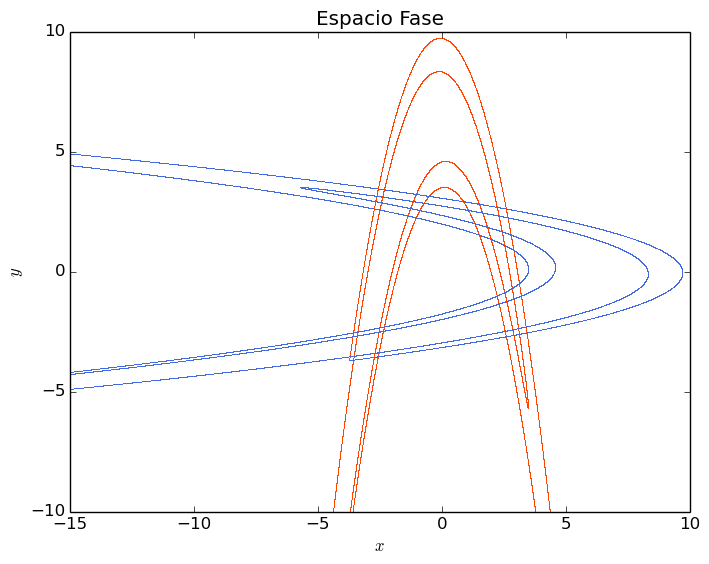

([-3.73861, -3.73861, -3.71385, -3.68912, -3.66442, -3.63974, -3.61509, -3.59046, -3.56586, -3.54129  …  -56619.6, -56624.8, -56630.0, -56635.2, -56640.4, -56645.6, -56650.8, -56656.0, -56661.2, -56666.4], [-3.73861, -3.73861, -3.73524, -3.73187, -3.72849, -3.72512, -3.72175, -3.71838, -3.715, -3.71163  …  -237.995, -238.006, -238.017, -238.028, -238.039, -238.05, -238.06, -238.071, -238.082, -238.093])

In [38]:
evaluar([0.,4486.], 0.025, U2[1],U2[2],punto4,"orangered")
evaluar([0.,4480.], 0.025, S2[1],S2[2],punto4,"royalblue")

In [39]:
tiem = [0.,4480.]
ErrorI_O20 = CalculoError(l_henon, U2,Uf2,tiem,0.025 )
ErrorE_O20 = CalculoError(l_henon, S2,Sc2,tiem,0.025 )

2-element Array{Array{Float64,1},1}:
 [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225  …  4479.77, 4479.8, 4479.82, 4479.85, 4479.88, 4479.9, 4479.93, 4479.95, 4479.98, 4480.0]                                                                       
 [4.44089e-16, 4.44089e-16, 4.44089e-16, 4.44089e-16, 4.44089e-16, 4.44089e-16, 4.44089e-16, 4.44089e-16, 4.44089e-16, 4.44089e-16  …  3149.35, 3149.62, 3149.89, 3150.17, 3150.44, 3150.71, 3150.99, 3151.26, 3151.53, 3151.81]

In [40]:
i_henon(x,y)=Henon(x,y,0.3,1.)
punto5 = parametro(0.3)

2-element Array{Float64,1}:
 -2.14018
 -2.14018

In [41]:
Orden = 65
tiempo = [0.,3.]
delta_t = 0.125
U3, Uf3, vec_propU3, val_propU3 = Inestable(i_henon,Orden, punto5 ,tiempo, delta_t)
S3, Sc3, vec_propS3, val_propS3 = Estable(i_henon, Orden , punto5, tiempo, delta_t)

(TaylorSeries.Taylor1{Float64}[ - 2.1401754250991383 + 0.9705989103937859 t - 0.07823753288171356 t² + 0.002477536124909316 t³ - 4.2022949083374186e-5 t⁴ + 4.419304547938094e-7 t⁵ - 3.160166547797721e-9 t⁶ + 1.635936592040316e-11 t⁷ - 6.41244663488399e-14 t⁸ + 1.9685943194163324e-16 t⁹ - 4.860147566174892e-19 t¹⁰ + 9.857278096958044e-22 t¹¹ - 1.6714543434622793e-24 t¹² + 2.4045531473372703e-27 t¹³ - 2.9715482302179597e-30 t¹⁴ + 3.188464720327369e-33 t¹⁵ - 2.9981909797913528e-36 t¹⁶ + 2.4908370066600892e-39 t¹⁷ - 1.8414433701758796e-42 t¹⁸ + 1.2192000386268334e-45 t¹⁹ - 7.27082016633562e-49 t²⁰ + 3.925787346579844e-52 t²¹ - 1.9281359376966573e-55 t²² + 8.651001572205137e-59 t²³ - 3.559626849771622e-62 t²⁴ + 1.3480437329110778e-65 t²⁵ - 4.714048102773503e-69 t²⁶ + 1.5268437769740045e-72 t²⁷ - 4.5933409692795634e-76 t²⁸ + 1.2868630405945957e-79 t²⁹ - 3.3656089638478095e-83 t³⁰ + 8.235890905390797e-87 t³¹ - 1.889720593389869e-90 t³² + 4.0737246222585455e-94 t³³ - 8.266230501026112e-98 t³⁴ 

In [42]:
evaluar([0.,486.], 0.025, U3[1],U3[2],punto5)
evaluar([0.,480.], 0.025, S3[1],S3[2],punto5)

LoadError: [91mMethodError: no method matching evaluar(::Array{Float64,1}, ::Float64, ::TaylorSeries.Taylor1{Float64}, ::TaylorSeries.Taylor1{Float64}, ::Array{Float64,1})[0m
Closest candidates are:
  evaluar(::Any, ::Any, ::Any, ::Any, ::Any, [91m::Any[39m) at In[10]:2[39m

In [43]:
tiem = [0.,480.]
ErrorI = CalculoError(i_henon, U3,Uf3,tiem,0.025 )
ErrorI2 = CalculoError(i_henon, S3,Sc3,tiem,0.025 )

2-element Array{Array{Float64,1},1}:
 [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225  …  479.775, 479.8, 479.825, 479.85, 479.875, 479.9, 479.925, 479.95, 479.975, 480.0]                                                                            
 [8.88178e-16, 8.99142e-16, 9.09828e-16, 9.20236e-16, 9.30367e-16, 9.40221e-16, 9.49797e-16, 9.59096e-16, 9.68117e-16, 9.76862e-16  …  227.237, 227.507, 227.777, 228.047, 228.318, 228.589, 228.861, 229.132, 229.404, 229.677]

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] log10(::Array{Float64,1}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/evelyn/.julia/v0.6/IJulia/src/execute_request.jl:158
 [5] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/evelyn/.julia/v0.6/Compat/src/Compat.jl:385
 [6] eventloop(::ZMQ.Socket) at /home/evelyn/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[44], in expression starting on line 1


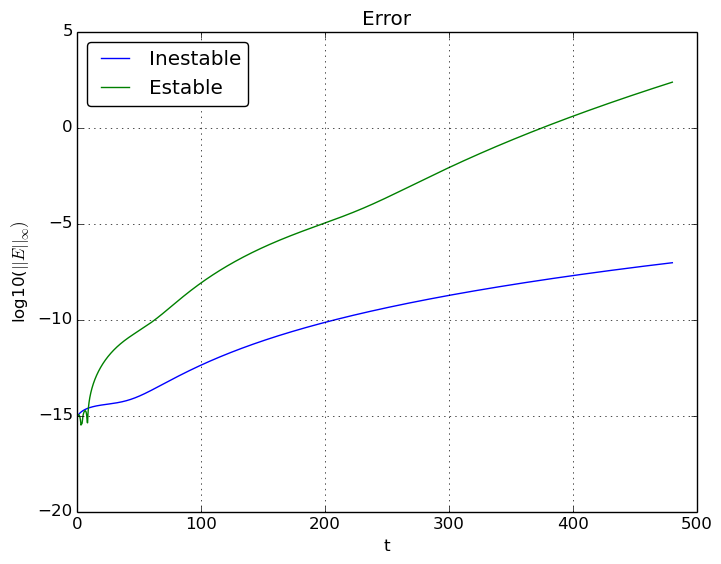

Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] log10(::Array{Float64,1}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/evelyn/.julia/v0.6/IJulia/src/execute_request.jl:158
 [5] (::Compat.#inner#17{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/evelyn/.julia/v0.6/Compat/src/Compat.jl:385
 [6] eventloop(::ZMQ.Socket) at /home/evelyn/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[44], in expression starting on line 2


PyObject <matplotlib.legend.Legend object at 0x7f85c8739410>

In [44]:
plot(ErrorI[1],log10(ErrorI[2]),marker= "None", label="Inestable")
plot(ErrorI2[1],log10(ErrorI2[2]),marker= "None", label="Estable")

xlabel("t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
grid("on")
legend(loc="low right",fancybox="true" )

Cuidado! esto grafica los errores en función del orden

In [ ]:
O1 = 20
O2 = 36
O3 = 45
O4 = 58
O5 = 70
O6 = 89
#O7 = 100
#O8 = 150
#O9 = 163
#O10 = 77
#x_fijo = [big(0.),big(0.)] 
#tiempo = [-big(3.),big(3.)]
tiempo = [0.,500]
delta_t = 0.125
p_fijo = punto1
W1, f1, vec1, val1 = Inestable(f_henon,O1 , p_fijo,tiempo, delta_t)
W2, f2, vec2, val2 = Inestable(f_henon,O2 , p_fijo,tiempo, delta_t)
W3, f3, vec3, val3 = Inestable(f_henon,O3 , p_fijo,tiempo, delta_t)
W4, f4, vec4, val4 = Inestable(f_henon,O4 , p_fijo,tiempo, delta_t)
W5, f5, vec5, val5 = Inestable(f_henon,O5 , p_fijo,tiempo, delta_t)


In [ ]:
Tiempo = [0.,8500.]
Error1A = CalculoError(f_henon, W1,f1,Tiempo,delta_t)
Error2A = CalculoError(f_henon, W2,f2,Tiempo,delta_t)
Error3A = CalculoError(f_henon, W3,f3,Tiempo,delta_t)
Error4A = CalculoError(f_henon, W4,f4,Tiempo,delta_t)
Error5A = CalculoError(f_henon, W5,f5,Tiempo,delta_t)


In [ ]:
plot(Error1A[1],log10(Error1A[2]),marker= "None", label="$O1")
plot(Error2A[1],log10(Error2A[2]),marker= "None", label="$O2")
plot(Error3A[1],log10(Error3A[2]),marker= "None", label="$O3")
plot(Error4A[1],log10(Error4A[2]),marker= "None", label="$O4")
plot(Error5A[1],log10(Error5A[2]),marker= "None", label="$O5")



xlabel("t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
#ylim(-16.,-13.2)
legend(loc="low right",fancybox="true")

In [ ]:
plot(log10(Error1A[1]),log10(Error1A[2]),marker= "None", label="$O1")
plot(log10(Error2A[1]),log10(Error2A[2]),marker= "None", label="$O2")
plot(log10(Error3A[1]),log10(Error3A[2]),marker= "None", label="$O3")
plot(log10(Error4A[1]),log10(Error4A[2]),marker= "None", label="$O4")
plot(log10(Error5A[1]),log10(Error5A[2]),marker= "None", label="$O5")



xlabel("t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
#ylim(-16.,-13.2)
legend(loc="low right",fancybox="true")

In [ ]:
C1=Convergencia(W1[1],W1[2])
C2=Convergencia(W2[1],W2[2])
C3=Convergencia(W3[1],W3[2])
C4=Convergencia(W4[1],W4[2])
C5=Convergencia(W5[1],W5[2])

In [ ]:
plot(C1[1],marker=".",label=L"$O1")
plot(C2[1],marker=".",label=L"$O2")
plot(C3[1],marker=".",label=L"$O3")
plot(C4[1],marker=".",label=L"$O4")
xlabel("Convergencia  t")
ylabel(L"a_{n+1}/a_{n}")
title("t")
grid("on")
title("Convergencia Hadamard")
legend(loc="upper right",fancybox="true" )


In [ ]:
c1=Convergencia3(W1[1],W1[2])
c2=Convergencia3(W2[1],W2[2])
c3=Convergencia3(W3[1],W3[2])
c4=Convergencia3(W4[1],W4[2])
c5=Convergencia3(W5[1],W5[2])

In [ ]:
plot(c1[1],marker=".",label=L"$O1")
plot(c2[1],marker=".",label=L"$O2")
plot(c3[1],marker=".",label=L"$O3")
plot(c4[1],marker=".",label=L"$O4")
xlabel(" t")

title("t")
grid("on")
title("Convergencia de tres términos  ")
legend(loc="upper right",fancybox="true")

In [ ]:
Orden = 25
tiempo = [0.,3.]
delta_t = 0.125
U4, Uf4, vec_propU4, val_propU4 = Inestable(i_henon,Orden, punto5 ,tiempo, delta_t)
S4, Sc4, vec_propS4, val_propS4 = Estable(i_henon, Orden , punto5, tiempo, delta_t)

In [ ]:
evaluar([0.,100.], 0.025, U4[1],U4[2],punto5)
evaluar([0.,100.], 0.025, S4[1],S4[2],punto5)

In [ ]:
Tiempo = [0.,100.]
ErrorU4 = CalculoError(i_henon, U4,Uf4,Tiempo,delta_t)
ErrorS4 = CalculoError(i_henon, S4,Sc4,Tiempo,delta_t)

In [ ]:
plot(ErrorU4[1],log10(ErrorU4[2]),marker= "None", label="Inestable")
plot(ErrorS4[1],log10(ErrorS4[2]),marker= "None", label="Estable")



xlabel("t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
#ylim(-16.,-13.2)
legend(loc="low right",fancybox="true")

In [ ]:
Orden = 25
#a= parse(BigFloat,"3.4")
#b=parse(BigFloat,"1.")
#x_fijo = parametro(a) 
c=parse(BigFloat,"180.")
tiempo = [0.,c]
delta_t = parse(BigFloat, "0.125")
W_uB, f_uB, vec_propuB, val_propuB = Inestable(h_henon,Orden , punto2,tiempo, delta_t)
W_sB, f_sB, vec_propsB, val_propsB = Estable(h_henon,Orden , punto2,tiempo, delta_t)

In [ ]:
evaluar([big(0.),big(1180.0)], big(0.025), W_uB[1],W_uB[2],punto2)
evaluar([big(0.),big(1180.0)], big(0.025),  W_sB[1],W_sB[2],punto2)

In [ ]:
ErrorIB_O20 = CalculoError(h_henon, W_uB,f_uB,[big(0.),big(180.)],big(0.025) )
ErrorEB_O20 = CalculoError(h_henon, W_sB,f_sB,[big(0.),big(180.)],big(0.025 ))

In [ ]:
plot(ErrorIB_O20[1],log10(ErrorIB_O20[2]),marker= "None", label="Inestable 20")
plot(ErrorEB_O20[1],log10(ErrorEB_O20[2]),marker= "None", label="Estable 20")

xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

Cuiadao! esto grafica los errores respecto del orden

In [ ]:
O1 = 20
O2 = 10
O3 = 30
O4 = 40
O5 = 25
O6 = 28
x_fijo = [0.,0.] 
tiempo = [-3.,3.]
delta_t = 0.125
V1, h1, vec1, val1 = Estable(f_estandar1,O1 , x_fijo,tiempo, delta_t)
V2, h2, vec2, val2 = Estable(f_estandar1,O2 , x_fijo,tiempo, delta_t)
V3, h3, vec3, val3 = Estable(f_estandar1,O3 , x_fijo,tiempo, delta_t)
V4, h4, vec4, val4 = Estable(f_estandar1,O4 , x_fijo,tiempo, delta_t)
V5, h5, vec5, val5 = Estable(f_estandar1,O5 , x_fijo,tiempo, delta_t)
V6, h6, vec6, val6 = Estable(f_estandar1,O6 , x_fijo,tiempo, delta_t)

In [ ]:
Tiempo = [0.,5.]
Error1A = CalculoError(f_estandar1, V1,h1,Tiempo,0.025 )
Error2A = CalculoError(f_estandar1, V2,h2,Tiempo,0.025 )
Error3A = CalculoError(f_estandar1, V3,h3,Tiempo,0.025 )
Error4A = CalculoError(f_estandar1, V4,h4,Tiempo,0.025 )
Error5A = CalculoError(f_estandar1, V5,h5,Tiempo,0.025 )
Error6A = CalculoError(f_estandar1, V6,h6,Tiempo,0.025 )



In [ ]:
plot(Error1A[1],log10(Error1A[2]),marker= "None", label="$O1")
plot(Error2A[1],log10(Error2A[2]),marker= "None", label="$O2")
plot(Error3A[1],log10(Error3A[2]),marker= "None", label="$O3")
plot(Error4A[1],log10(Error4A[2]),marker= "None", label="$O4")
plot(Error5A[1],log10(Error5A[2]),marker= "None", label="$O5")
plot(Error6A[1],log10(Error6A[2]),marker= "None", label="$O6")


xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
#ylim(-16.,-15.2)
legend(loc="low right",fancybox="true" )


## Vamos a graficar las superficies 

In [ ]:
function evaluar_g(Tiempo, paso,A,B)
    ValX=Float64[]
    
    ValY=Float64[]

    for t = Tiempo[1]:paso:Tiempo[2]
        
        x = evaluate(A,t)
    
        y = evaluate(B,t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    return ValX,ValY
    
end

In [ ]:
Orden = 10
tiempo1 = [0.,60.]
tiempo2 = [0.,50.]
delta_t = 0.125
figure(1)
for a in 2.:0.1:8.6
    henon_p(x,y)=Henon(x,y,a,1.)
    punto4=parametro(a)
    U2, Uf2, vec_propU2, val_propU2 = Inestable(henon_p,Orden, punto4 ,tiempo1, delta_t)
    S2, Sc2, vec_propS2, val_propS2 = Estable(henon_p, Orden , punto4, tiempo2, delta_t)
    
    B=evaluar_g(tiempo2, delta_t, S2[1],S2[2])
    V=evaluar_g(tiempo1, delta_t, U2[1],U2[2])
    
    #pygui(true)
    plot3D(B[2],B[1],a,zdir="z",color="orangered",alpha=0.3)
    plot3D(V[2],V[1],a,zdir="z",color ="royalblue",alpha=0.5)
    #plot3D(punto4[1],punto4[2],a,zdir="z",color="blue")
    xlim(-2*pi,2*pi)
    ylim(-2*pi,2*pi)
    #zlim(0,8)
    xlabel(L"x")
    ylabel(L"y")
    zlabel("Parámetro")
    #title("Variedades")
    
end